GENETİK ALGORİTMA PROJESİ - SENARYO 0

Ad Soyad: Mehmet Ali Uçak
Okul No: 2312721050
Ders: BLG307 Yapay Zeka Sistemleri
GitHub Linki: https://github.com/maucak/genetik_optimizasyonu

Senaryo0: Akıllı Depoda Raf Yüksekliği ve Derinliği Ayarı: y = 4x1 + 3x2 - 0.5x1x2
Kısıtlar:
- Raf yüksekliği (x1) 2 ile 6 arasında
- Raf derinliği (x2) 1 ile 4 arasında
- Toplam alan (x1 + x2) en fazla 8 olabilir
- Derinlik en az 1.5 olmalı

In [ ]:
#Kütüphaneler rastgelelik, sayısal işlemler ve grafik çizimi için eklendi.
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Genetik algoritmanın parametreleri ve değişkenlerin sınırları belirlenmiştir.
POPULASYON_BOYUTU = 50
NESIL_SAYISI = 100
MUTASYON_ORANI = 0.1

X1_SINIRLARI = (2, 6)
X2_SINIRLARI = (1, 4)

In [ ]:
#Amaç fonksiyonu
def amac_fonksiyonu(x1, x2):
    return 4*x1 + 3*x2 - 0.5*x1*x2

#Kısıtlara uyulmaması ceza uygulanarak fitness değeri bulunmuştur.
def fitness(birey):
    x1, x2 = birey
    ceza_puani = 0

    if x1 + x2 > 8:
        ceza_puani += 50 * (x1 + x2 - 8)

    if x2 < 1.5:
        ceza_puani += 50 * (1.5 - x2)

    return amac_fonksiyonu(x1, x2) - ceza_puani

In [ ]:
def birey_olustur():
    return [
        random.uniform(*X1_SINIRLARI),
        random.uniform(*X2_SINIRLARI)
    ]

def populasyon_olustur():
    return [birey_olustur() for _ in range(POPULASYON_BOYUTU)]


In [ ]:
 # Rastgele 3 kişi seçilip en iyisi alınmıştır
def turnuva_secimi(populasyon, k=3):
    secilenler = random.sample(populasyon, k)
    return max(secilenler, key=fitness)

#Ebeveynlerin genleri çaprazlanarak yeni çözümler üretilmişdir.
def caprazlama(p1, p2):
    alpha = random.random()

    c1 = [alpha*p1[0] + (1-alpha)*p2[0],
          alpha*p1[1] + (1-alpha)*p2[1]]

    c2 = [alpha*p2[0] + (1-alpha)*p1[0],
          alpha*p2[1] + (1-alpha)*p1[1]]

    return c1, c2

#Çeşitliliği artırmak için bireylere mutasyon uygulanmıştır.
def mutasyon(birey):
    if random.random() < MUTASYON_ORANI:
        birey[0] += random.uniform(-0.3, 0.3)
        birey[1] += random.uniform(-0.3, 0.3)

    birey[0] = np.clip(birey[0], *X1_SINIRLARI)
    birey[1] = np.clip(birey[1], *X2_SINIRLARI)

In [ ]:
#Bu bölümde genetik algoritmanın ana döngüsü çalıştırılmıştır. Her nesilde popülasyon uygunluk (fitness) değerine göre sıralanmış,
#en iyi birey elitizm yöntemiyle doğrudan yeni nesle aktarılmıştır. Turnuva seçimi ile ebeveynler belirlenmiş, çaprazlama ve mutasyon işlemleri uygulanarak yeni bireyler üretilmiştir.
#Nesiller boyunca elde edilen en iyi uygunluk değerleri kaydedilmiş ve sonunda en yüksek skora sahip çözüm elde edilmiştir.
populasyon = populasyon_olustur()
en_iyi_skorlar = []

print("Genetik Algoritma calistiriliyor...")

for nesil in range(NESIL_SAYISI):
    populasyon.sort(key=fitness, reverse=True)

    en_iyi_birey = populasyon[0]
    en_iyi_skorlar.append(fitness(en_iyi_birey))

    yeni_populasyon = [en_iyi_birey]

    while len(yeni_populasyon) < POPULASYON_BOYUTU:
        e1 = turnuva_secimi(populasyon)
        e2 = turnuva_secimi(populasyon)

        c1, c2 = caprazlama(e1, e2)

        mutasyon(c1)
        mutasyon(c2)

        yeni_populasyon.extend([c1, c2])

    populasyon = yeni_populasyon[:POPULASYON_BOYUTU]

en_iyi = max(populasyon, key=fitness)
skor = fitness(en_iyi)

print("\n--- SONUÇLAR ---")
print(f"En iyi x1 (Yükseklik): {en_iyi[0]:.4f}")
print(f"En iyi x2 (Derinlik):  {en_iyi[1]:.4f}")
print(f"Elde Edilen Skor:      {skor:.4f}")

Genetik Algoritma calistiriliyor...

--- SONUÇLAR ---
En iyi x1 (Yükseklik): 6.0000
En iyi x2 (Derinlik):  1.7396
Elde Edilen Skor:      24.0000


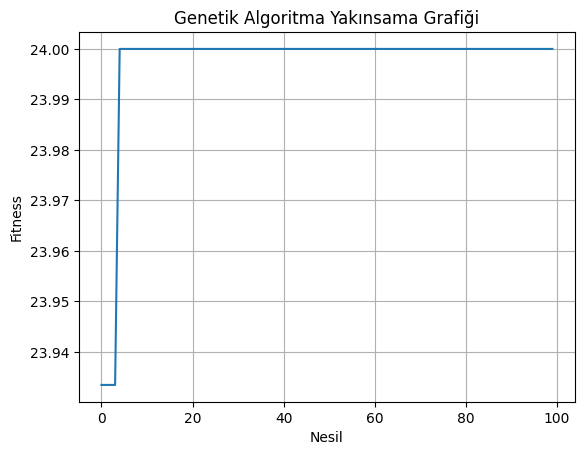

In [ ]:
plt.plot(en_iyi_skorlar)
plt.xlabel("Nesil")
plt.ylabel("Fitness")
plt.title("Genetik Algoritma Yakınsama Grafiği")
plt.grid()
plt.show()